In [45]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
from keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix
import seaborn as sns


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualize the dataset

Target labels:  [0 3 9 7 0 4 9 8 8 3]


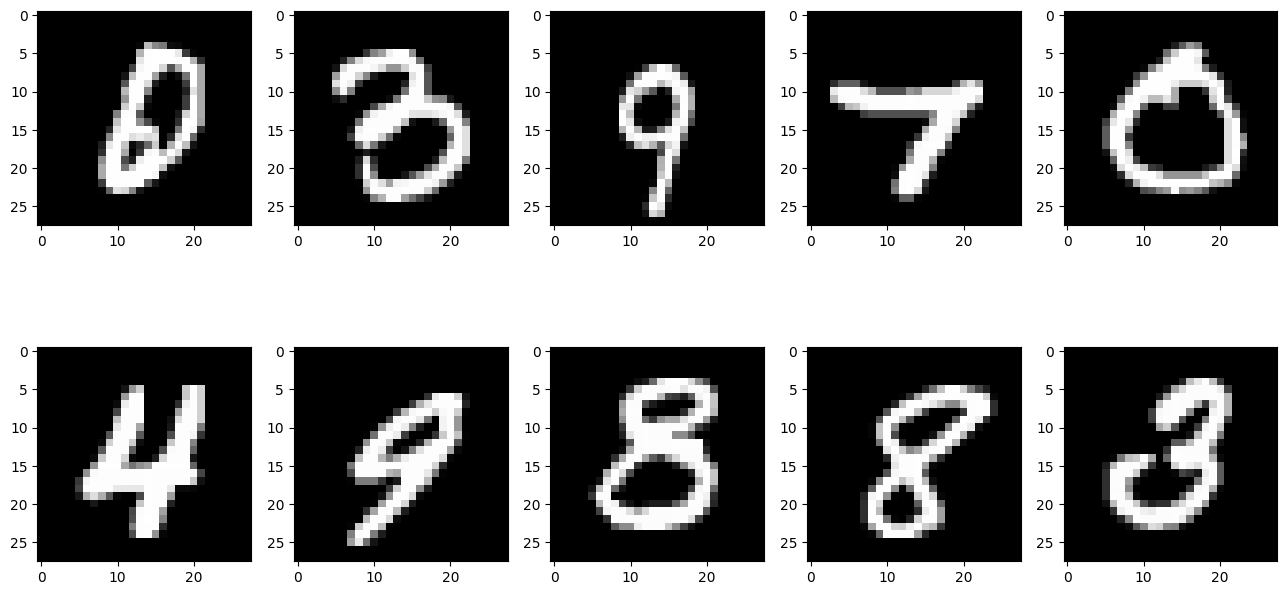

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

a.	Improve the test accuracy of the model by changing the hyperparameters.

In [34]:
from keras.regularizers import l1, l2

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

# Increased the input_dim units in Dense parameters to increase the accuracy
model.add(Dense(256,activation='relu'))
model.add(Dense(64,input_dim=256,activation='relu'))
model.add(Dense(32,input_dim=256,activation='relu'))
model.add(Dense(10,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

b.	Add L1 and L2 regularization terms to the model and retrain the model.

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

# Added L1 regularization terms to the model
model.add(Dense(256,activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(64,input_dim=256,activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(32,input_dim=256,activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(10,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

# Added L2 regularization terms to the model
model.add(Dense(256,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64,input_dim=256,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32,input_dim=256,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               200960    
                                                                 
 dense_29 (Dense)            (None, 64)                16448     
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


Train the model

In [36]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2260 - accuracy: 0.9318
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0932 - accuracy: 0.9711
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0661 - accuracy: 0.9793
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0488 - accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0400 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0326 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0269 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0250 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0202 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

Plot the loss and accuracy graphs

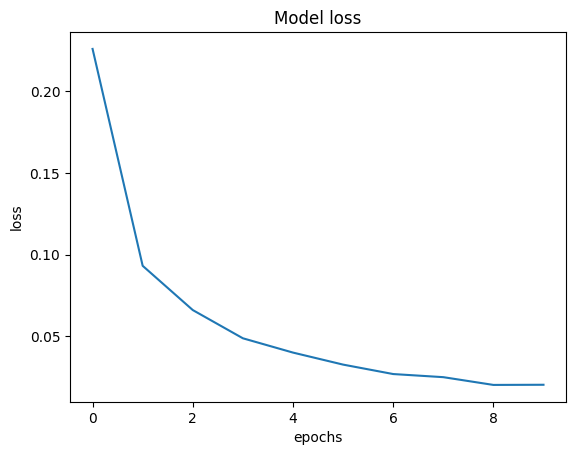

In [37]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

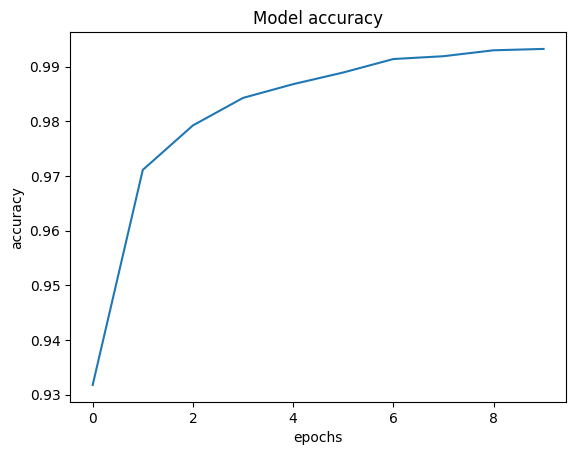

In [38]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [39]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0781 - accuracy: 0.9808
Loss of the Test dataset is: 0.07808199524879456
Accuracy of the test dataset is: 0.9807999730110168


Save the model weights

In [40]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

c.	Visualize class-wise test dataset performance

In [48]:
# Generate Predictions
predictions = model.predict(new_test_data)

313/313 [==============================] - 1s 3ms/step


In [49]:
# Convert Predictions and True Labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(new_test_target, axis=1)

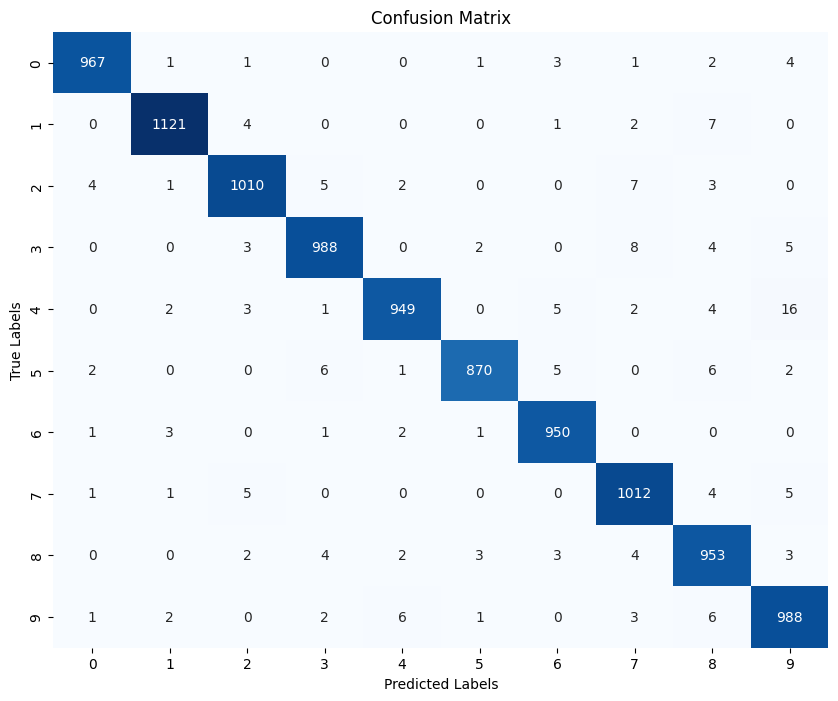

In [50]:
# Create the Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()